## Build a Regression Model in Keras

In this Project we will build a regression model using the deep learning Keras library, and then you will experiment with increasing the number of training epochs and changing number of hidden layers and will see how changing these parameters impacts the performance of the model

Concrete Ingredients:

* Cement
* Blast Furnace Slag
* Fly Ash
* Water
* Superplasticizer
* Coarse Aggregate
* Fine Aggregate
* Age

### 1. Setting the Environment and reading the data

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#url for the concerte data
url = 'https://cocl.us/concrete_data'

df = pd.read_csv(url)
print(df.shape)
df.head()

(1030, 9)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### 2. Exploratory Data Analysis

In [3]:
#checking the summary statistics of the data
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [4]:
#checking is any missing value 
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

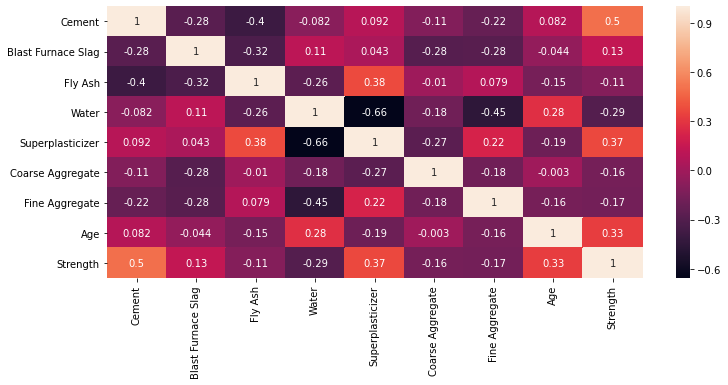

In [5]:
#correlation matrix
plt.figure(figsize=(12, 5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### 3. Splitting Data : Training and Validation

In [9]:
#Split Data to Predictors and Target
X = df.iloc[:,:-1]
n_cols = X.shape[1]
print(n_cols)
X.head(2)

8


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28


In [8]:
y = df.iloc[:,-1]
y.head(2)

0    79.99
1    61.89
Name: Strength, dtype: float64

### 4. Building the Deep Learning Model with Keras

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import keras

from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\arpendu.ganguly\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\arpendu.ganguly\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\arpendu.ganguly\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qi


#### Part A: Build a Baseline Model
Network Properties:

* Hidden Layer: 1
* Nodes: 10
* Activation Function: ReLU
* Optimizer: Adam
* Loss Function: Mean Squared Error
* Epochs: 50

In [11]:
mse_A = []
r2_A = []

for i in range(50):
    
    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    #Create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))

    #Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    #fit the model
    model.fit(X_train, y_train, epochs=50, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)
    
    mse_A.append(mean_squared_error(y_test, y_pred))
    r2_A.append(r2_score(y_test, y_pred))

W0214 15:36:01.888866 28028 deprecation_wrapper.py:119] From C:\Users\arpendu.ganguly\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0214 15:36:01.955686 28028 deprecation_wrapper.py:119] From C:\Users\arpendu.ganguly\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0214 15:36:02.036471 28028 deprecation_wrapper.py:119] From C:\Users\arpendu.ganguly\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0214 15:36:02.083345 28028 deprecation_wrapper.py:119] From C:\Users\arpendu.ganguly\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprec

In [12]:
print('mse_Mean for Baseline Model : {:.2f}'.format(np.mean(mse_A)))
print('mse_StdDev for Baseline Model : {:.2f}'.format(np.std(mse_A)))
print('R^2_Mean for Baseline Model : {:.2f}'.format(np.mean(r2_A)))
print('R^2_StdDev for Baseline Model : {:.2f}'.format(np.std(r2_A)))

mse_Mean for Baseline Model : 411.27
mse_StdDev Baseline Model : 373.29
R^2_Mean Baseline Model : -0.51
R^2_StdDev Baseline Model : 1.42


#### Part B: Build a Baseline Model but using the normalized version of the data
Network Properties:

* Hidden Layer: 1
* Nodes: 10
* Activation Function: ReLU
* Optimizer: Adam
* Loss Function: Mean Squared Error
* Epochs: 50

In [13]:
X_norm = (X - X.mean()) / X.std()
X_norm.head(2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597


In [14]:
mse_B = []
r2_B = []

for i in range(50):
    
    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3)

    #Create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))

    #Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    #fit the model
    model.fit(X_train, y_train, epochs=50, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)
    
    mse_B.append(mean_squared_error(y_test, y_pred))
    r2_B.append(r2_score(y_test, y_pred))

In [15]:
print('mse_Mean for Baseline Model with Normalized Data: {:.2f}'.format(np.mean(mse_B)))
print('mse_StdDev for Baseline Model with Normalized Data : {:.2f}'.format(np.std(mse_B)))
print('R^2_Mean for Baseline Model with Normalized Data: {:.2f}'.format(np.mean(r2_B)))
print('R^2_StdDev for Baseline Model with Normalized Data: {:.2f}'.format(np.std(r2_B)))

mse_Mean for Baseline Model with Normalized Data: 367.68
mse_StdDev for Baseline Model with Normalized Data : 115.98
R^2_Mean for Baseline Model with Normalized Data: -0.33
R^2_StdDev for Baseline Model with Normalized Data: 0.40


#### Part C: Build a Baseline Model but use 100 epochs this time for training
Network Properties:

* Hidden Layer: 1
* Nodes: 10
* Activation Function: ReLU
* Optimizer: Adam
* Loss Function: Mean Squared Error
* Epochs: 100

In [18]:
mse_C = []
r2_C = []

for i in range(50):
    
    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3)

    #Create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))

    #Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    #fit the model
    model.fit(X_train, y_train, epochs=100, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)
    
    mse_C.append(mean_squared_error(y_test, y_pred))
    r2_C.append(r2_score(y_test, y_pred))

In [19]:
print('mse_Mean with No. of Epochs= 100 : {:.2f}'.format(np.mean(mse_C)))
print('mse_StdDev with No. of Epochs= 100 : {:.2f}'.format(np.std(mse_C)))
print('R^2_Mean with No. of Epochs= 100 : {:.2f}'.format(np.mean(r2_C)))
print('R^2_StdDev with No. of Epochs= 100 : {:.2f}'.format(np.std(r2_C)))

mse_Mean with No. of Epochs= 100 : 164.10
mse_StdDev with No. of Epochs= 100 : 14.03
R^2_Mean with No. of Epochs= 100 : 0.41
R^2_StdDev with No. of Epochs= 100 : 0.06


#### Part D: Build a Baseline Model but use 100 epochs AND Normalized Datathis time for training
Network Properties:

* Hidden Layer: 1
* Nodes: 10
* Activation Function: ReLU
* Optimizer: Adam
* Loss Function: Mean Squared Error
* Epochs: 100

In [20]:
mse_D = []
r2_D = []

for i in range(50):
    
    #Split Data to Train and Test Set
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.3)

    #Create model
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))

    #Compile model
    model.compile(optimizer='adam', loss='mean_squared_error')

    #fit the model
    model.fit(X_train, y_train, epochs=100, verbose=0)

    #predict output on test set
    y_pred = model.predict(X_test)
    
    mse_D.append(mean_squared_error(y_test, y_pred))
    r2_D.append(r2_score(y_test, y_pred))

In [21]:
print('mse_Mean with Normalized Data and 100 Epochs : {:.2f}'.format(np.mean(mse_D)))
print('mse_StdDev with Normalized Data and 100 Epochs : {:.2f}'.format(np.std(mse_D)))
print('R^2_Mean with Normalized Data and 100 Epochs : {:.2f}'.format(np.mean(r2_D)))
print('R^2_StdDev with Normalized Data and 100 Epochs : {:.2f}'.format(np.std(r2_D)))

mse_Mean with Normalized Data and 100 Epochs : 87.15
mse_StdDev with Normalized Data and 100 Epochs : 22.22
R^2_Mean with Normalized Data and 100 Epochs : 0.68
R^2_StdDev with Normalized Data and 100 Epochs : 0.08


### 4. Evaluating all Model Measures

In [24]:
from IPython.display import HTML, display
import tabulate

tabletest = [['STEPS','MSE: Mean','MSE: StdDev','R^2: Mean','R^2: StdDev'],
         ['Part A', round(np.mean(mse_A),2), round(np.std(mse_A),2), round(np.mean(r2_A),2), round(np.std(r2_A),2)],
         ['Part B', round(np.mean(mse_B),2), round(np.std(mse_B),2), round(np.mean(r2_B),2), round(np.std(r2_B),2)],
         ['Part C', round(np.mean(mse_C),2), round(np.std(mse_C),2), round(np.mean(r2_D),2), round(np.std(r2_C),2)],
         ['Part D', round(np.mean(mse_D),2), round(np.std(mse_D),2), round(np.mean(r2_D),2), round(np.std(r2_D),2)]]

display(HTML(tabulate.tabulate(tabletest, tablefmt='html')))

STEPS,MSE: Mean,MSE: StdDev,R^2: Mean,R^2: StdDev
Part A,411.27,373.29,-0.51,1.42
Part B,367.68,115.98,-0.33,0.4
Part C,164.1,14.03,0.68,0.06
Part D,87.15,22.22,0.68,0.08


From the results above, we can clearly see that by applying:

Data Normalization,
Increasing Epochs,
and Increasing Hidden Layers
#### the mean of MSE has gone down, while the mean of R^2 has gone up indicating that the model accuracy is getting better.